## Retrieving data from the dataset

In [74]:
! pip install --upgrade pip

In [75]:
! pip install pipreqs
! pip install afinn
! pip install pandas
! pip install seaborn

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariiapyvovar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariiapyvovar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariiapyvovar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
webis_tldr_subreddit = pd.read_csv('cleaned_webis_tldr_subreddit_explainlikeimfive.csv',  sep = ';')
webis_tldr_subreddit.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a..."
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i..."
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver..."


### Preprocessing data for sentiment

In [78]:
def preprocess_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text() # Removing HTML tags
    
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Removing URLs
    
    text = text.lower() # Lowercase the text
    
    text = re.sub(r'\W', ' ', text) # Removing punctuation and special characters
    
    words = word_tokenize(text) # Tokenizing the text
    
    stop_words = set(stopwords.words('english')) # Removing stopwords
    
    words = [word for word in words if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer() # Lemmatizing the words
    
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back to string
    text = ' '.join(words)
    
    return text

In [79]:
# Calculate the number of rows in the dataframe
num_rows = webis_tldr_subreddit.shape[0]

# Print the number of rows
print(f'The number of rows in the dataframe is: {num_rows}')

The number of rows in the dataframe is: 25414


In [80]:
# I tried it first on the smaller sample, before applying to the whole subreddit
webis_tldr_sample = webis_tldr_subreddit.sample(n=1000, random_state=42)
print(f'Sample size: {webis_tldr_sample.shape}')

Sample size: (1000, 8)


### Analysing data with VADER

In [81]:
# Initializing the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [82]:
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        sentiment_label = 'positive'
    elif compound <= -0.05:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    
    return sentiment_label, compound

In [83]:
# Apply sentiment analysis to the 'content' column
webis_tldr_subreddit['vader_sentiment'], webis_tldr_subreddit['vader_score'] = zip(*webis_tldr_subreddit['content'].apply(get_vader_sentiment))

In [84]:
# Save the updated dataframe with sentiment labels to a CSV file
webis_tldr_subreddit.to_csv('webis_tldr_subreddit_with_sentiment.csv', index=False)

In [85]:
webis_tldr_subreddit.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary,vader_sentiment,vader_score
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",positive,0.6808
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,positive,0.9874
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,positive,0.9330
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",positive,0.9916
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",positive,0.9891


In [86]:
# Calculating the proportions of each sentiment
sentiment_counts = webis_tldr_subreddit['vader_sentiment'].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Define the color palette
color_palette = sns.color_palette('viridis', len(sentiment_counts))
color_map = {'positive': color_palette[0], 'neutral': color_palette[1], 'negative': color_palette[2]}

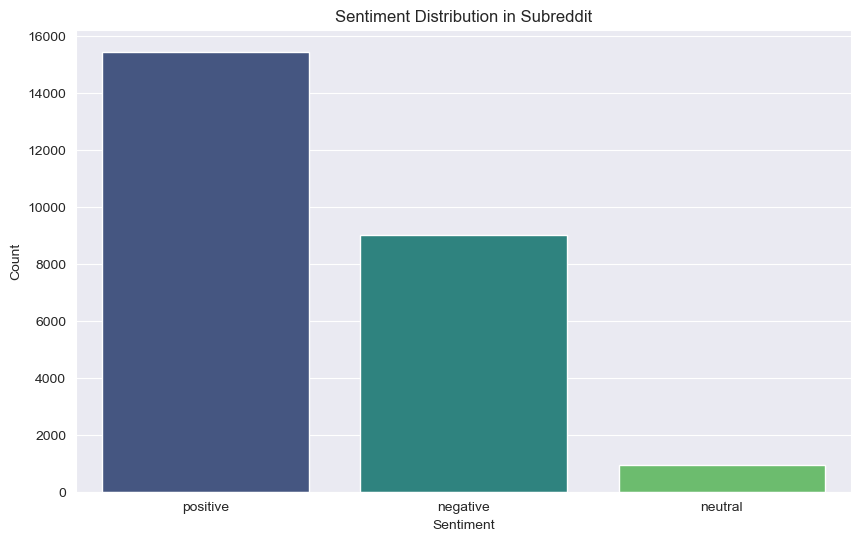

In [87]:
# Plotting the histogram of sentiment distribution (VADER)
plt.figure(figsize=(10, 6))
sns.countplot(x='vader_sentiment', data=webis_tldr_subreddit, palette=color_palette)
plt.title('Sentiment Distribution in Subreddit')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

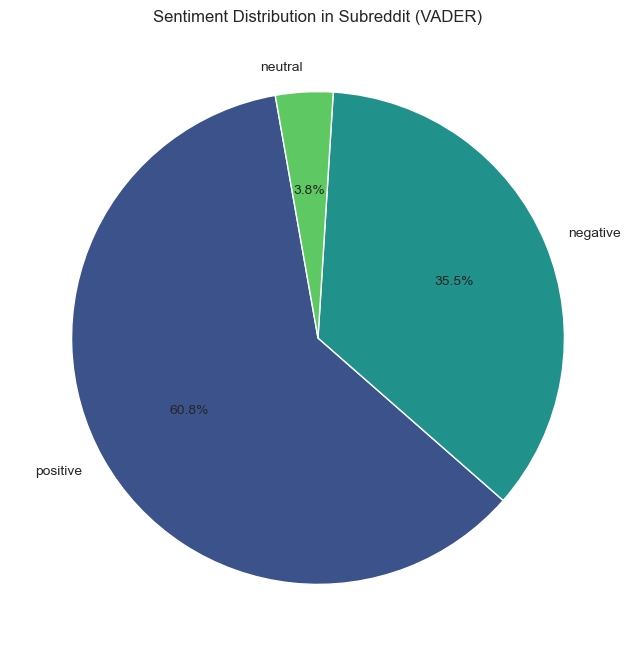

In [88]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', len(sentiment_counts))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', colors=colors, startangle=100)
plt.title('Sentiment Distribution in Subreddit (VADER)')
plt.show()

### Analysing data with Afinn


Next I am performing lexicon based sentiment analysis using Afinn. It is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word.

In [89]:
# Loading the dataset
webis_tldr_subreddit = pd.read_csv('webis_tldr_subreddit_with_sentiment.csv', sep=',')

In [90]:
# Initializing the AFINN sentiment analyzer
afinn = Afinn()

webis_tldr_subreddit['content'] = webis_tldr_subreddit['content'].astype(str).replace('nan', '')

In [91]:
def get_afinn_sentiment(text, afinn):
    score = afinn.score(text)
    if score > 0:
        sentiment_label = 'positive'
    elif score < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    return score, sentiment_label

In [92]:
# Applying sentiment analysis to the 'content' column
webis_tldr_subreddit['afinn_score'], webis_tldr_subreddit['afinn_sentiment'] = zip(*webis_tldr_subreddit['content'].apply(lambda x: get_afinn_sentiment(x, afinn)))
webis_tldr_subreddit.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary,vader_sentiment,vader_score,afinn_score,afinn_sentiment
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",positive,0.6808,3.0,positive
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,positive,0.9874,23.0,positive
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,positive,0.9330,11.0,positive
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",positive,0.9916,17.0,positive
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",positive,0.9891,36.0,positive


In [93]:
webis_tldr_subreddit.to_csv('data_with_sentiment.csv', index=False)

In [94]:
# Calculating the proportions of each sentiment
sentiment_counts = webis_tldr_subreddit['afinn_sentiment'].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Define the color palette
color_palette = sns.color_palette('viridis', len(sentiment_counts))
color_map = {'positive': color_palette[0], 'neutral': color_palette[1], 'negative': color_palette[2]}

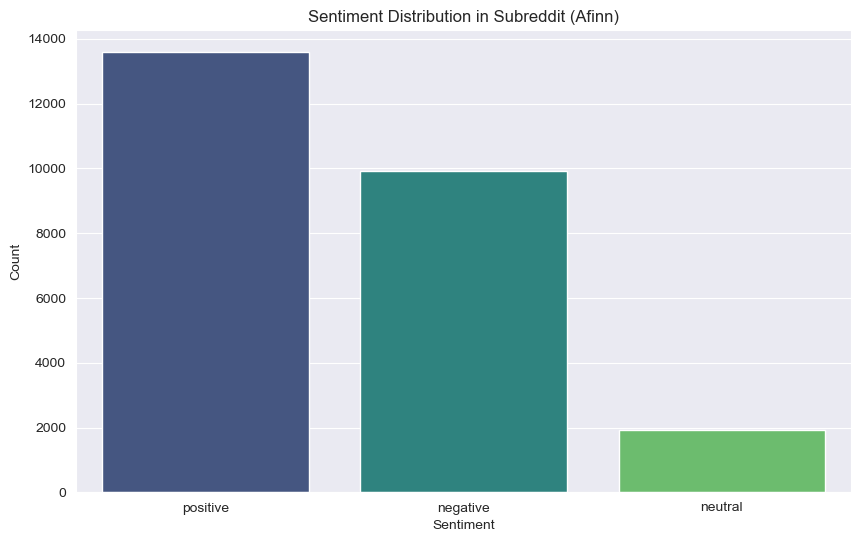

In [95]:
# Plotting the histogram of sentiment distribution (Afinn)
plt.figure(figsize=(10, 6))
sns.countplot(x='afinn_sentiment', data=webis_tldr_subreddit, palette=color_palette)
plt.title('Sentiment Distribution in Subreddit (Afinn)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

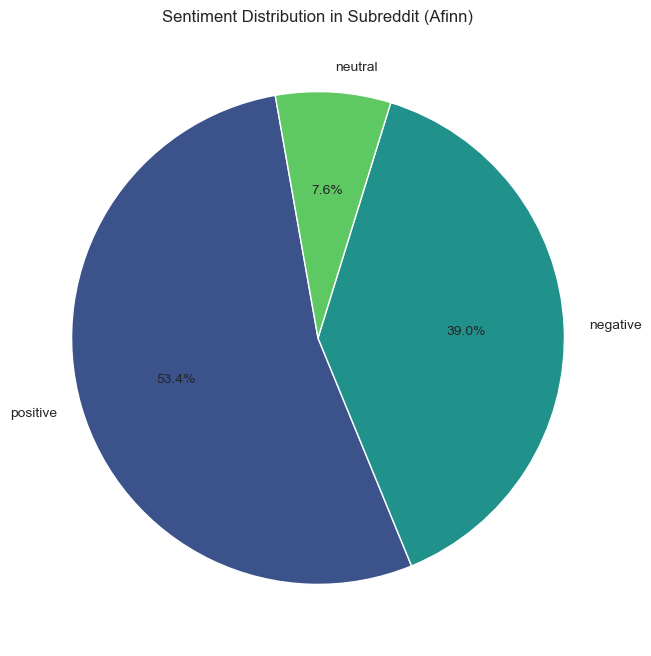

In [96]:
# Creating a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', len(sentiment_counts))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', colors=colors, startangle=100)
plt.title('Sentiment Distribution in Subreddit (Afinn)')
plt.show()

In [97]:
webis_tldr_subreddit[['vader_sentiment', 'afinn_sentiment']].head()

,vader_sentiment,afinn_sentiment
0,positive,positive
1,positive,positive
2,positive,positive
3,positive,positive
4,positive,positive


In [98]:
# Melting the dataframe to long format for easier plotting
melted_df = pd.melt(webis_tldr_subreddit, id_vars=['content'], value_vars=['vader_sentiment', 'afinn_sentiment'], 
                    var_name='analysis_method', value_name='sentiment_label')

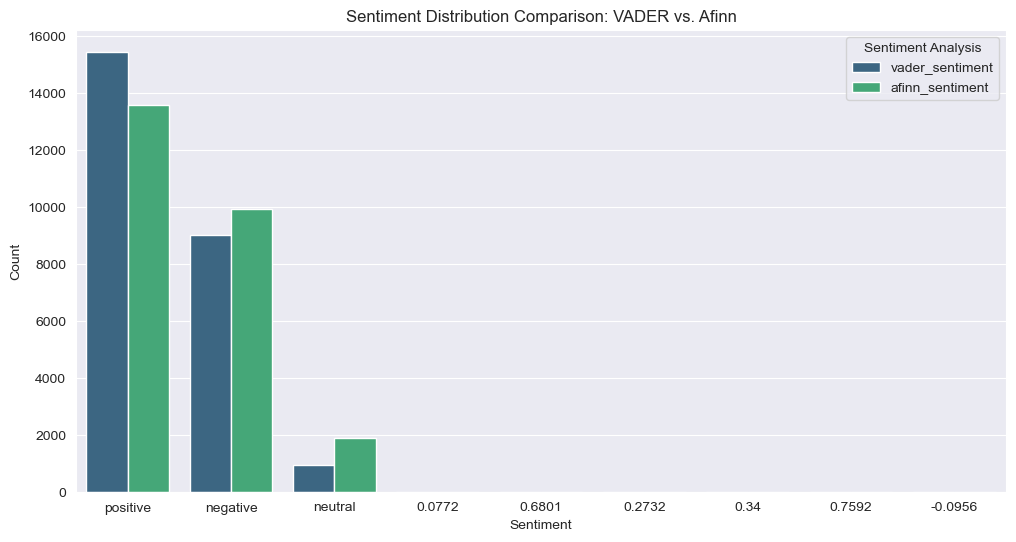

In [99]:
# Ploting the histogram of sentiment distribution (VADER vs Afinn)
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_label', hue='analysis_method', data=melted_df, palette='viridis')
plt.title('Sentiment Distribution Comparison: VADER vs. Afinn')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Sentiment Analysis', loc='upper right')
plt.show()

## Topic modeling and Sentiment

In [100]:
data_topics = pd.read_csv('data_topics.csv')
data_with_sentiment = pd.read_csv('data_with_sentiment.csv')
data_topics

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary,Topic
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",Telecommunications Infrastructure
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,Political Ideologies and Economic Systems
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,Political Parties and Elections
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",Political Ideologies and Economic Systems
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",Cinema and Filmmaking
...,...,...,...,...,...,...,...,...,...
25421,tedcase,I took no notice of it at first because of jus...,I took no notice of it at first because of jus...,explainlikeimfive,t5_2sokd,t3_38ys1t,i took no notice of it at first because of jus...,"version of the modern flat earth theory, and w...",Community Posting
25422,JedWasTaken,I realize that our eyesight can be permanently...,I realize that our eyesight can be permanently...,explainlikeimfive,t5_2sokd,t3_2zk4yp,i realize that our eyesight can be permanently...,or elaborate explanation for this topic!,Color Perception and Visual Physiology
25423,[deleted],After reading through pages and pages of infor...,After reading through pages and pages of infor...,explainlikeimfive,t5_2sokd,t3_kizn8,after reading through pages and pages of infor...,ers out there.,Middle Eastern Affairs and Religious Extremism
25424,OneFatTurkey,*now wait wait wait* \n\nI obviously don't mea...,now wait wait wait \n I obviously don't mean t...,explainlikeimfive,t5_2sokd,t3_31l0jz,now wait wait wait \n i obviously don't mean t...,"of this thread: ""evil cop"" incidences have pro...",Law Enforcement


In [101]:
data_with_sentiment

,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary,vader_sentiment,vader_score,afinn_score,afinn_sentiment
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",positive,0.6808,3.0,positive
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,positive,0.9874,23.0,positive
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,positive,0.9330,11.0,positive
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",positive,0.9916,17.0,positive
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",positive,0.9891,36.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
25421,tedcase,I took no notice of it at first because of jus...,I took no notice of it at first because of jus...,explainlikeimfive,t5_2sokd,t3_38ys1t,i took no notice of it at first because of jus...,"version of the modern flat earth theory, and w...",negative,-0.7136,-4.0,negative
25422,JedWasTaken,I realize that our eyesight can be permanently...,I realize that our eyesight can be permanently...,explainlikeimfive,t5_2sokd,t3_2zk4yp,i realize that our eyesight can be permanently...,or elaborate explanation for this topic!,positive,0.8535,-1.0,negative
25423,[deleted],After reading through pages and pages of infor...,After reading through pages and pages of infor...,explainlikeimfive,t5_2sokd,t3_kizn8,after reading through pages and pages of infor...,ers out there.,positive,0.7773,1.0,positive
25424,OneFatTurkey,*now wait wait wait* \n\nI obviously don't mea...,now wait wait wait \n I obviously don't mean t...,explainlikeimfive,t5_2sokd,t3_31l0jz,now wait wait wait \n i obviously don't mean t...,"of this thread: ""evil cop"" incidences have pro...",negative,-0.6827,-9.0,negative


In [102]:
merged_topic_sentiment = pd.read_csv('subreddit(topic+sentiment).csv')
merged_topic_sentiment.head()

,author,body,normalizedBody,subreddit,subreddit_id,id,content_x,summary,Topic,content_y,vader_score,afinn_score,vader_sentiment,afinn_sentiment
0,Cypriotmenace,Think of it like mailing pages of a book to di...,Think of it like mailing pages of a book to di...,explainlikeimfive,t5_2sokd,c6dydfx,think of it like mailing pages of a book to di...,"always look for the highest seeded torrents, a...",Telecommunications Infrastructure,think of it like mailing pages of a book to di...,0.6808,3.0,positive,positive
1,senatorskeletor,"""Redistribution"" is short for ""redistribution ...","""Redistribution"" is short for ""redistribution ...",explainlikeimfive,t5_2sokd,c6whsmv,"redistribution"" is short for ""redistribution o...",1) using the tax system to take money from the...,Political Ideologies and Economic Systems,"redistribution"" is short for ""redistribution o...",0.9874,23.0,positive,positive
2,callumgg,"The Chinese system isn't exactly transparent, ...","The Chinese system isn't exactly transparent, ...",explainlikeimfive,t5_2sokd,c6y9grw,"the chinese system isn't exactly transparent, ...",2700 delegates and representatives from all ov...,Political Parties and Elections,"the chinese system isn't exactly transparent, ...",0.9330,11.0,positive,positive
3,mcanerin,Here is an analogy I've used before and might ...,Here is an analogy I've used before and might ...,explainlikeimfive,t5_2sokd,c6yj68l,here is an analogy i've used before and might ...,"the communist party isn't a political party, i...",Political Ideologies and Economic Systems,here is an analogy i've used before and might ...,0.9916,17.0,positive,positive
4,neo45,"This is a complicated question, but I think it...","This is a complicated question, but I think it...",explainlikeimfive,t5_2sokd,c7fuozw,"this is a complicated question, but i think it...","there's lots of good actors out there, but ver...",Cinema and Filmmaking,"this is a complicated question, but i think it...",0.9891,36.0,positive,positive


## Analysis with VADER

In [103]:
# Define function to assign sentiment labels
def assign_sentiment_label_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling to create a new column
merged_topic_sentiment['vader_sentiment'] = merged_topic_sentiment['vader_score'].apply(assign_sentiment_label_vader)

# Group by 'Topic' and calculate sentiment label counts
sentiment_counts_per_topic = merged_topic_sentiment.groupby(['Topic', 'vader_sentiment']).size().unstack(fill_value=0)
sentiment_counts_per_topic = sentiment_counts_per_topic.reset_index()

In [104]:
# Calculate total counts
sentiment_counts_per_topic['total'] = sentiment_counts_per_topic['positive'] + sentiment_counts_per_topic['negative'] + sentiment_counts_per_topic['neutral']

# Sort by total count in descending order
sentiment_counts_per_topic = sentiment_counts_per_topic.sort_values(by='total', ascending=False)


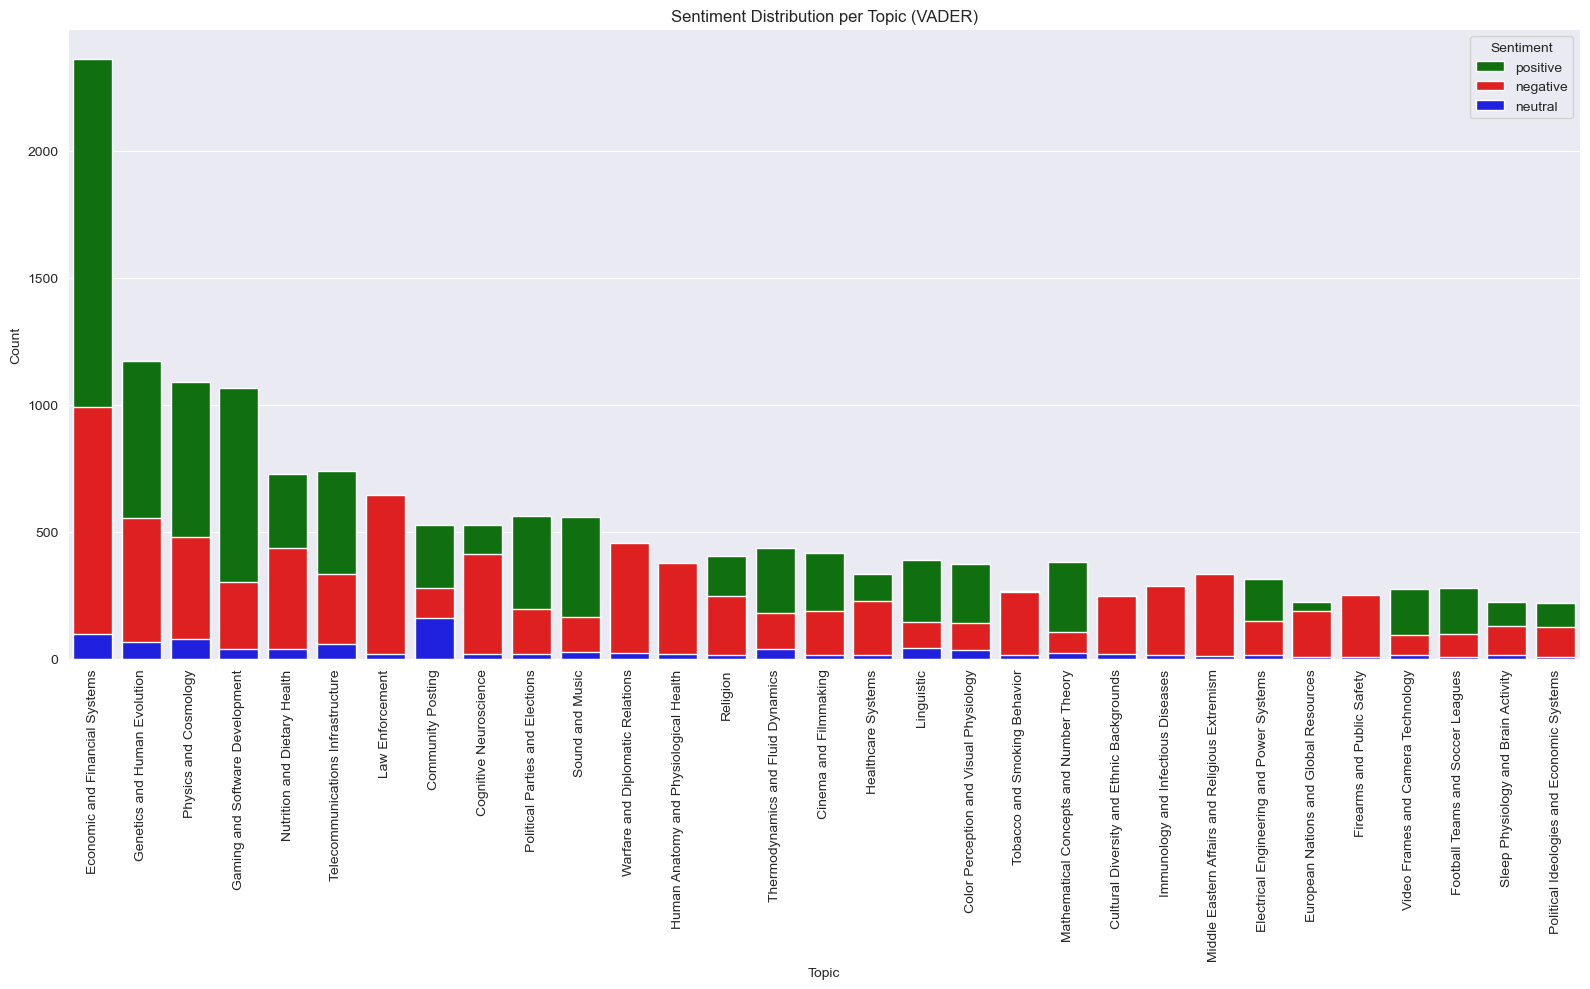

In [105]:
# Plotting sentiment distribution per topic in descending order of total count
plt.figure(figsize=(16, 10))
sns.barplot(x='Topic', y='positive', data=sentiment_counts_per_topic, color='green', label='positive')
sns.barplot(x='Topic', y='negative', data=sentiment_counts_per_topic, color='red', label='negative')
sns.barplot(x='Topic', y='neutral', data=sentiment_counts_per_topic, color='blue', label='neutral')

plt.title('Sentiment Distribution per Topic (VADER)')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

In [106]:
sentiment_counts_per_topic = merged_topic_sentiment.groupby(['Topic', 'vader_sentiment']).size().unstack(fill_value=0)
sentiment_ratios_per_topic = sentiment_counts_per_topic.div(sentiment_counts_per_topic.sum(axis=1), axis=0)

# Sort topics by positive sentiment ratio in descending order
sentiment_ratios_per_topic = sentiment_ratios_per_topic.sort_values(by='positive', ascending=False)

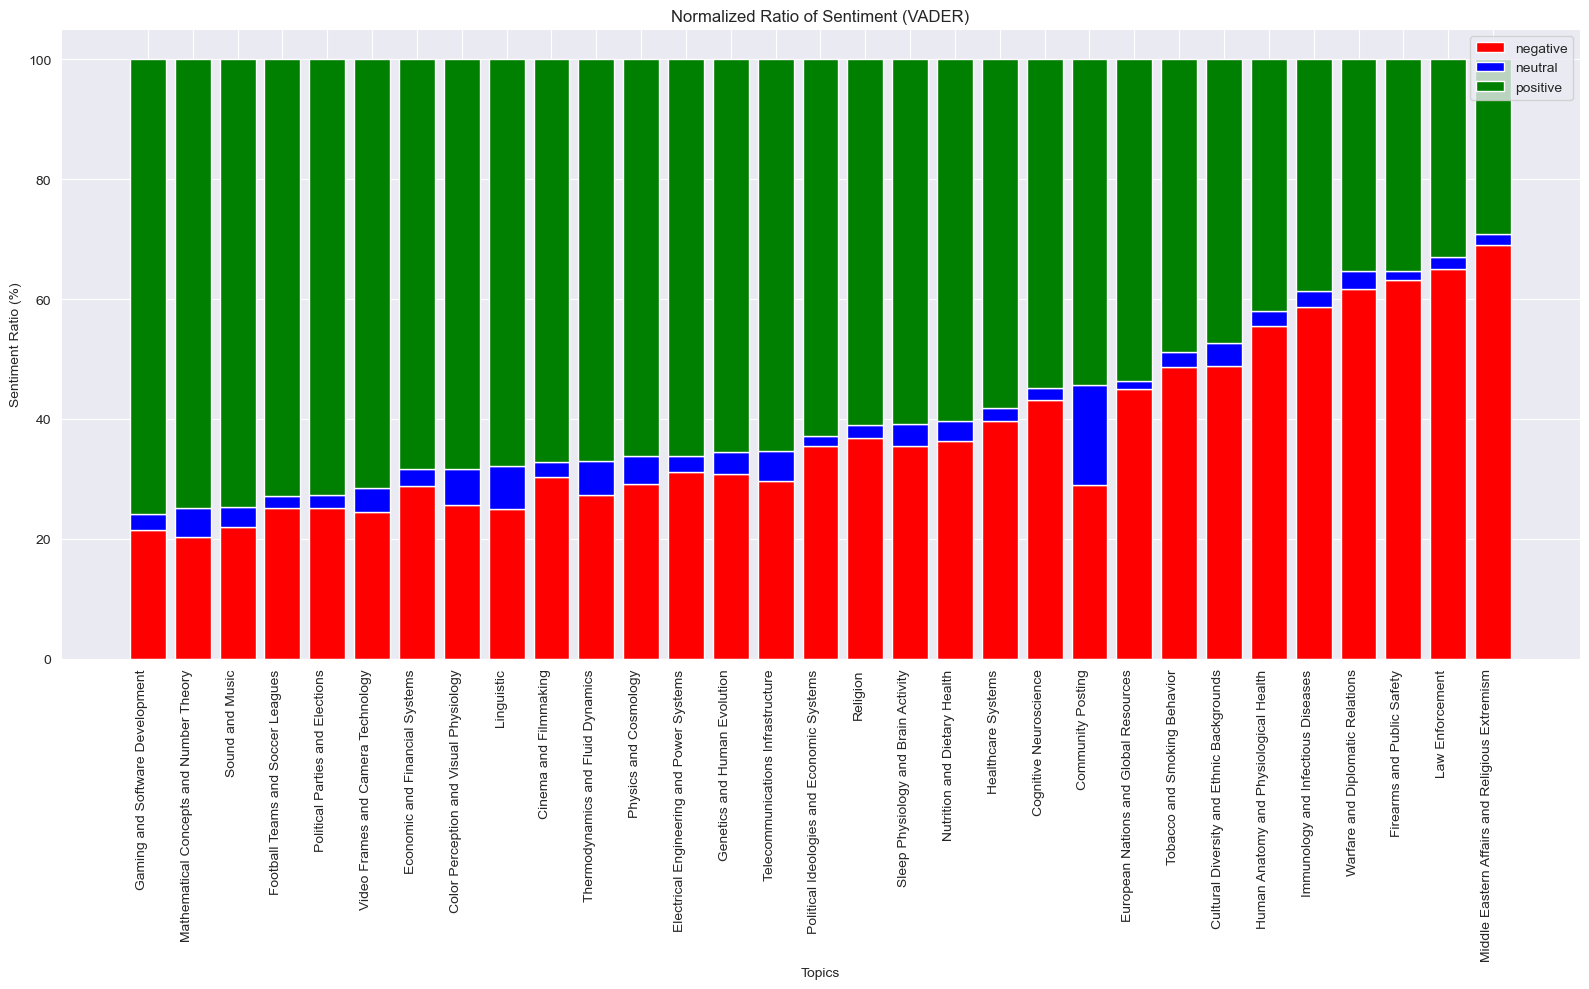

In [107]:
# Calculate percentages
df_total = sentiment_ratios_per_topic.sum(axis=1)
df_rel = sentiment_ratios_per_topic.div(df_total, axis=0) * 100

# Plotting
plt.figure(figsize=(16, 10)) 

# Define colors for each sentiment category
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

# Plot stacked bars
topics = df_rel.index
bar_width = 0.8

# Initialize bottom positions for stacking
bottom = np.zeros(len(topics))

for sentiment in df_rel.columns:
    plt.bar(topics, df_rel[sentiment], bottom=bottom, color=colors[sentiment], label=sentiment)
    bottom += df_rel[sentiment]

# Add labels and title
plt.xlabel('Topics')
plt.ylabel('Sentiment Ratio (%)')
plt.title('Normalized Ratio of Sentiment (VADER)')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()

## VADER mean per topic

In [108]:
mean_sentiment_per_topic_vader = merged_topic_sentiment.groupby('Topic')['vader_score'].mean().reset_index()
mean_sentiment_per_topic_vader

,Topic,vader_score
0,Cinema and Filmmaking,0.331139
1,Cognitive Neuroscience,0.101704
2,Color Perception and Visual Physiology,0.343916
3,Community Posting,0.181572
4,Cultural Diversity and Ethnic Backgrounds,-0.032538
5,Economic and Financial Systems,0.343978
6,Electrical Engineering and Power Systems,0.283263
7,European Nations and Global Resources,0.073764
8,Firearms and Public Safety,-0.282906
9,Football Teams and Soccer Leagues,0.416051


In [109]:
mean_sentiment_per_topic_vader['Sentiment'] = mean_sentiment_per_topic_vader['vader_score'].apply(assign_sentiment_label_vader)
# Map sentiment labels to colors
color_map = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}
mean_sentiment_per_topic_vader['Color'] = mean_sentiment_per_topic_vader['Sentiment'].map(color_map)

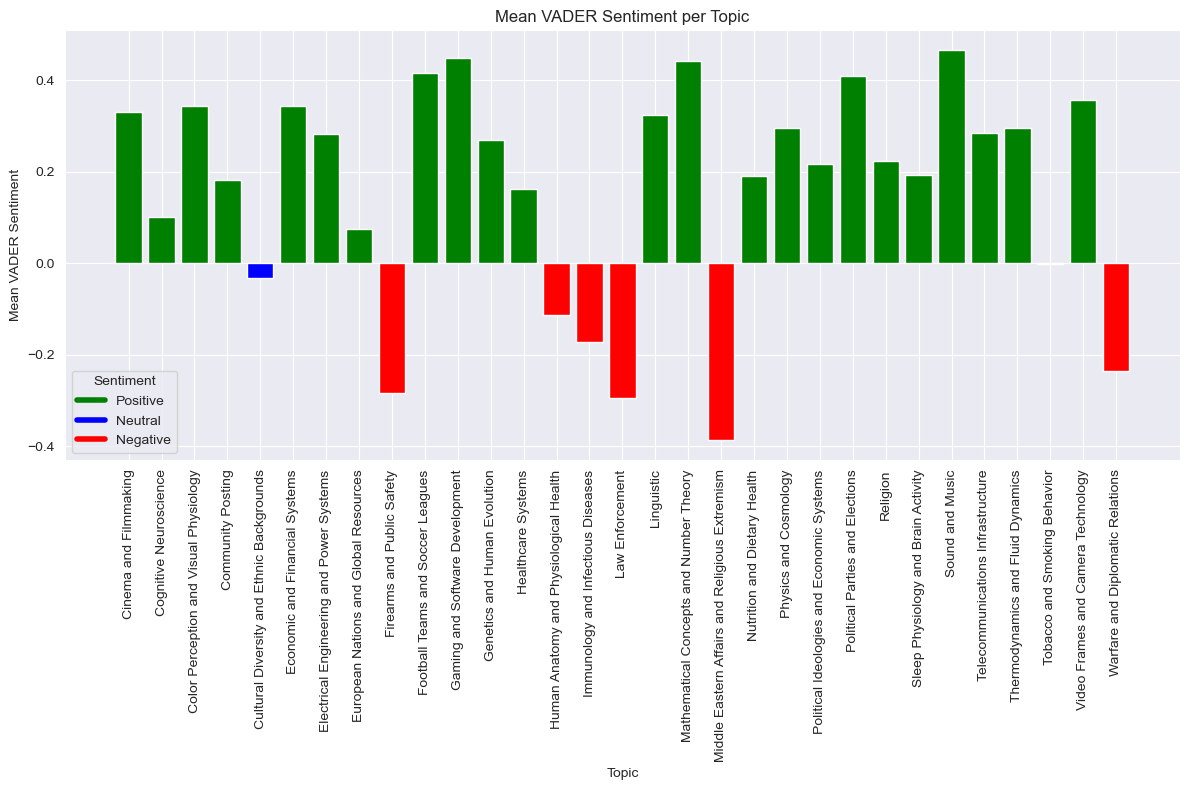

In [110]:
# Visualizing the mean sentiment per topic with colors based on sentiment
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_sentiment_per_topic_vader['Topic'], mean_sentiment_per_topic_vader['vader_score'], color=mean_sentiment_per_topic_vader['Color'])
plt.xlabel('Topic')
plt.ylabel('Mean VADER Sentiment')
plt.title('Mean VADER Sentiment per Topic')
plt.xticks(rotation=90)
plt.tight_layout()

# Creating a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='blue', lw=4, label='Neutral'),
                   Line2D([0], [0], color='red', lw=4, label='Negative')]
plt.legend(handles=legend_elements, title='Sentiment')

plt.show()

## Afinn total 

In [111]:
# Define function to assign sentiment labels
def assign_sentiment_label_afinn(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling to create a new column
merged_topic_sentiment['afinn_sentiment'] = merged_topic_sentiment['afinn_score'].apply(assign_sentiment_label_afinn)

# Group by 'Topic' and calculate sentiment label counts
sentiment_counts_per_topic = merged_topic_sentiment.groupby(['Topic', 'afinn_sentiment']).size().unstack(fill_value=0)
sentiment_counts_per_topic = sentiment_counts_per_topic.reset_index()

In [112]:
# Calculate total counts
sentiment_counts_per_topic['total'] = sentiment_counts_per_topic['positive'] + sentiment_counts_per_topic['negative'] + sentiment_counts_per_topic['neutral']

# Sort by total count in descending order
sentiment_counts_per_topic = sentiment_counts_per_topic.sort_values(by='total', ascending=False)


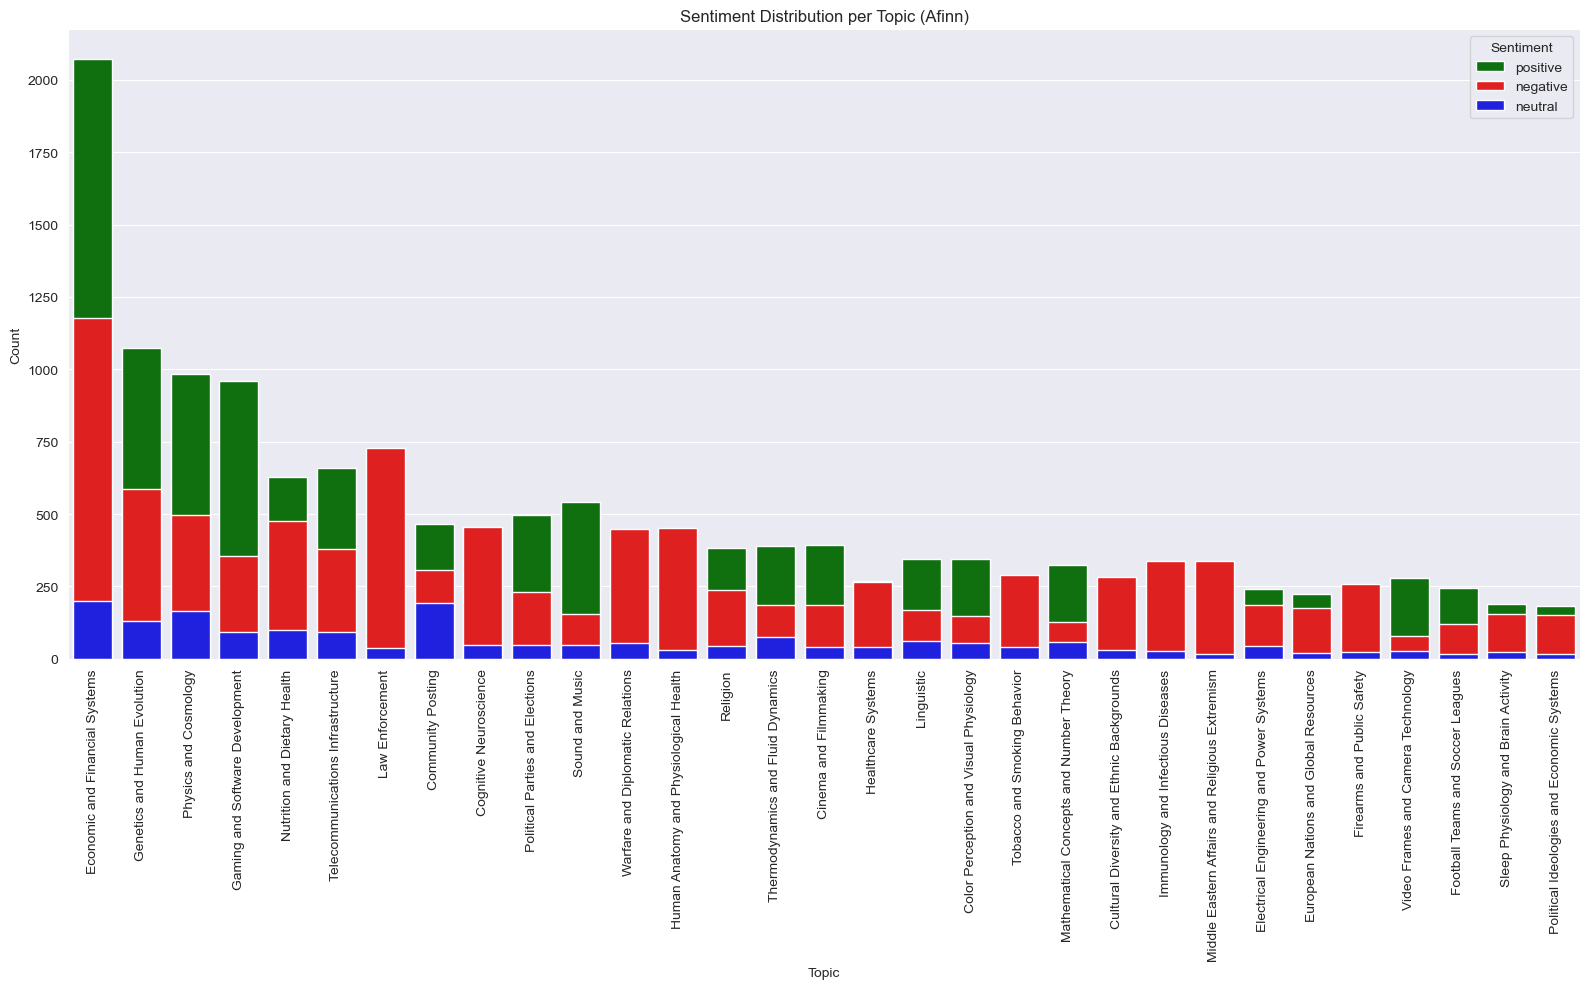

In [113]:
# Plotting sentiment distribution per topic
plt.figure(figsize=(16, 10))
sns.barplot(x='Topic', y='positive', data=sentiment_counts_per_topic, color='green', label='positive')
sns.barplot(x='Topic', y='negative', data=sentiment_counts_per_topic, color='red', label='negative')
sns.barplot(x='Topic', y='neutral', data=sentiment_counts_per_topic, color='blue', label='neutral')

plt.title('Sentiment Distribution per Topic (Afinn)')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

In [114]:
sentiment_counts_per_topic = merged_topic_sentiment.groupby(['Topic', 'afinn_sentiment']).size().unstack(fill_value=0)
sentiment_ratios_per_topic = sentiment_counts_per_topic.div(sentiment_counts_per_topic.sum(axis=1), axis=0)

# Sort topics by positive sentiment ratio in descending order
sentiment_ratios_per_topic = sentiment_ratios_per_topic.sort_values(by='positive', ascending=False)

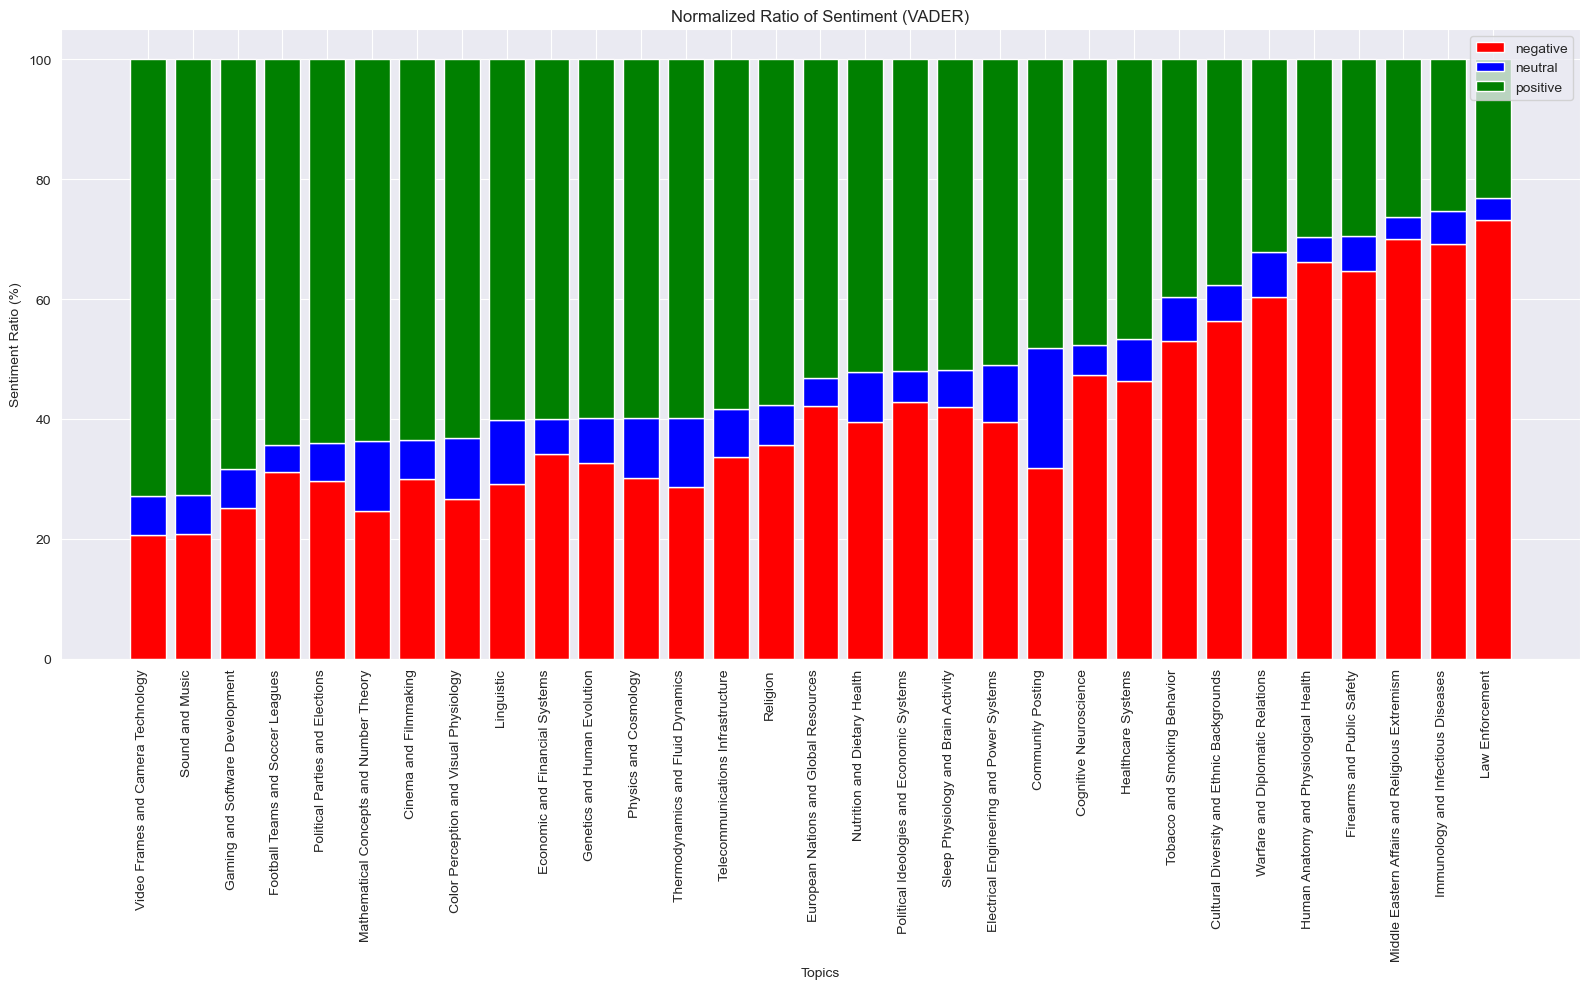

In [115]:
# Calculate percentages
df_total = sentiment_ratios_per_topic.sum(axis=1)
df_rel = sentiment_ratios_per_topic.div(df_total, axis=0) * 100

# Plotting
plt.figure(figsize=(16, 10)) 

# Define colors for each sentiment category
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

# Plot stacked bars
topics = df_rel.index
bar_width = 0.8

# Initialize bottom positions for stacking
bottom = np.zeros(len(topics))

for sentiment in df_rel.columns:
    plt.bar(topics, df_rel[sentiment], bottom=bottom, color=colors[sentiment], label=sentiment)
    bottom += df_rel[sentiment]

# Add labels and title
plt.xlabel('Topics')
plt.ylabel('Sentiment Ratio (%)')
plt.title('Normalized Ratio of Sentiment (VADER)')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


## Afinn mean per topic

In [116]:
mean_sentiment_per_topic_afinn = merged_topic_sentiment.groupby('Topic')['afinn_score'].mean().reset_index()
mean_sentiment_per_topic_afinn

,Topic,afinn_score
0,Cinema and Filmmaking,4.929147
1,Cognitive Neuroscience,-1.327766
2,Color Perception and Visual Physiology,3.180987
3,Community Posting,0.425907
4,Cultural Diversity and Ethnic Backgrounds,-4.898204
5,Economic and Financial Systems,3.455626
6,Electrical Engineering and Power Systems,0.801268
7,European Nations and Global Resources,0.253589
8,Firearms and Public Safety,-8.367758
9,Football Teams and Soccer Leagues,4.842932


In [117]:
mean_sentiment_per_topic_afinn['Sentiment'] = mean_sentiment_per_topic_afinn['afinn_score'].apply(assign_sentiment_label_afinn)

color_map = {'positive': 'green', 'neutral': 'blue', 'negative': 'red'}
mean_sentiment_per_topic_afinn['Color'] = mean_sentiment_per_topic_afinn['Sentiment'].map(color_map)

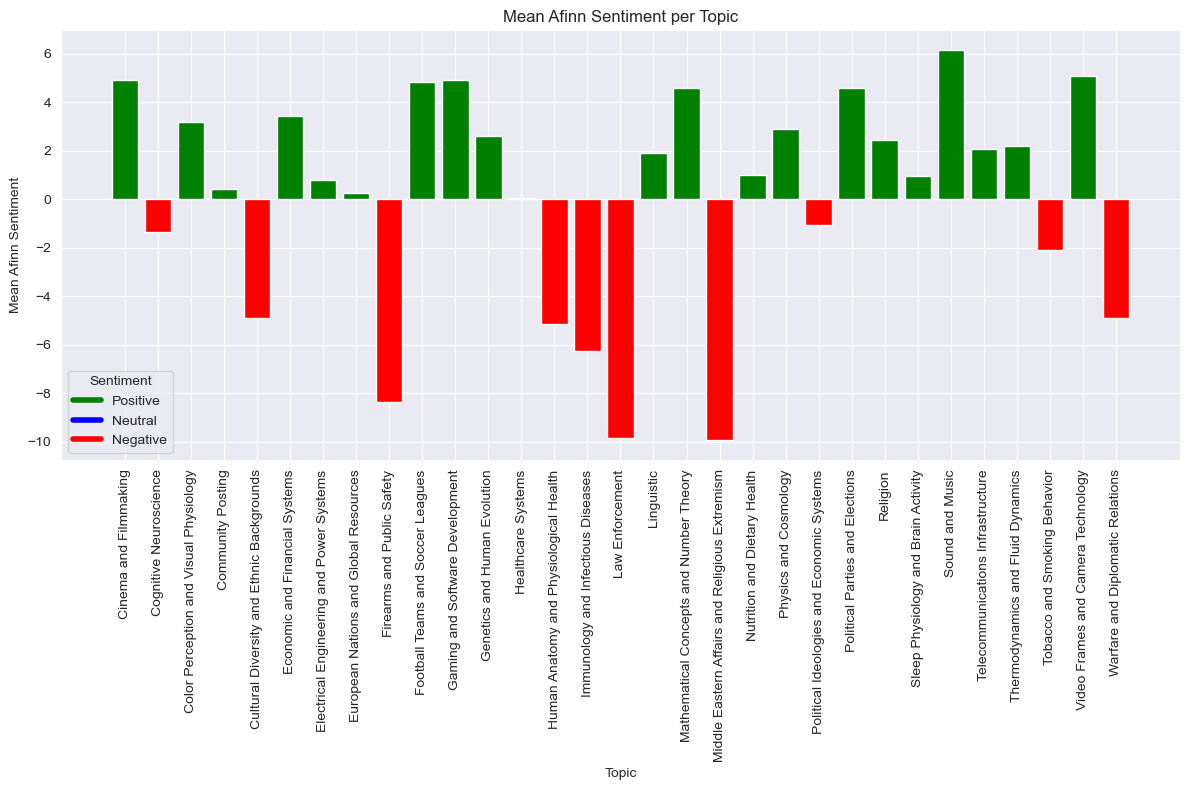

In [118]:
# Visualize the mean sentiment per topic with colors based on sentiment
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_sentiment_per_topic_afinn['Topic'], mean_sentiment_per_topic_afinn['afinn_score'], color=mean_sentiment_per_topic_afinn['Color'])
plt.xlabel('Topic')
plt.ylabel('Mean Afinn Sentiment')
plt.title('Mean Afinn Sentiment per Topic')
plt.xticks(rotation=90)
plt.tight_layout()

# Create a legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='green', lw=4, label='Positive'),
                   Line2D([0], [0], color='blue', lw=4, label='Neutral'),
                   Line2D([0], [0], color='red', lw=4, label='Negative')]
plt.legend(handles=legend_elements, title='Sentiment')

plt.show()

## Conclusions: 

As we can see there is the slight difference between the two models VADER and Afinn, but due to the lack of human labeled data it is impossible to define which model predicted more accurately. But VADER is more popular to use for analysis with an accuracy of 88.7%, whereas AFINN Lexicon has an accuracy of 86.0%. VADER is also better at interpreting informal language, emojis, nuanced sentiments and better identifies sarcasm. On average both models showed similar results, Afinn identified on average more negative posts than positive.

In [119]:
import platform

# Get the operating system name
os_name = platform.system()

# Get the platform version
os_version = platform.version()

# Get the machine's hardware architecture
architecture = platform.machine()

print(f"Operating System: {os_name}")
print(f"Version: {os_version}")
print(f"Architecture: {architecture}")

Operating System: Darwin
Version: Darwin Kernel Version 23.5.0: Wed May  1 20:19:05 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8112
Architecture: arm64


In [122]:
import platform

# Operating system information
os_name = platform.system()  # Get the operating system name (e.g., 'Windows', 'Linux', 'Darwin' for macOS)
os_version = platform.version()  # Get the operating system version
architecture = platform.machine()  # Get the machine architecture

# Print software environment information
print(f"Operating System: {os_name} {os_version}")
print(f"Architecture: {architecture}")

Operating System: Darwin Darwin Kernel Version 23.5.0: Wed May  1 20:19:05 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8112
Architecture: arm64
